In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

In [2]:
#Read in the 3 data sets
healthcare_infections_pd = pd.read_csv("Outputs\\Healthcare_Associated_Infections-State-clean.csv")
healthcare_spending_pd = pd.read_csv("Outputs\\Medicare_Hospital_Spending_Per_Patient-State-clean.csv")
readmission_pd = pd.read_csv("Outputs\\readmission_perfomance_of_state.csv")


In [3]:
# Merge into one data frame
merged_df = pd.merge(healthcare_infections_pd, healthcare_spending_pd, on="State", how="inner")
merged_df = pd.merge(merged_df, readmission_pd, on="State", how="inner")
merged_df.head()

,State,SIR Average,Score,Number of Hospitals Worse,Number of Hospitals Same,Number of Hospitals Better,Number of Hospitals Too Few,Total Hospitals,% Outstanding Hospitals,% Under Performing,% Average Performance
0,WV,1.045333,0.99,5.0,183.0,0.0,105.0,293.0,0.00,1.71,62.46
1,NM,1.011833,0.92,1.0,138.0,2.0,84.0,225.0,0.89,0.44,61.33
2,VT,0.997167,0.98,1.0,72.0,0.0,16.0,89.0,0.00,1.12,80.90
3,MS,0.992167,1.03,6.0,294.0,0.0,164.0,464.0,0.00,1.29,63.36
4,ID,0.971833,0.97,0.0,123.0,9.0,101.0,233.0,3.86,0.00,52.79


In [4]:
# rename score to spending score
merged_df = merged_df.rename(columns={"Score": "Spending Score"})

In [5]:
# Add linear regressions to the scatterplots
def add_linear_regression(axs, x, y, color):
    slope, intercept, _, _, _ = linregress(x, y)
    axs.plot(x, intercept + slope * x, color=color)

In [6]:
# Reordered list of readmission performance metrics so they look better on the plots
reordered_metrics_top = ['Number of Hospitals Better', 'Number of Hospitals Same', 'Number of Hospitals Worse']
reordered_metrics_bottom = ['% Outstanding Hospitals', '% Average Performance', '% Under Performing']

In [7]:
# Customize colors for different performance metrics
colors_top_row = {'Number of Hospitals Better': 'g', 'Number of Hospitals Same': 'y', 'Number of Hospitals Worse': 'r'}
colors_bottom_row = {'% Outstanding Hospitals': 'g', '% Under Performing': 'r', '% Average Performance': 'y'}

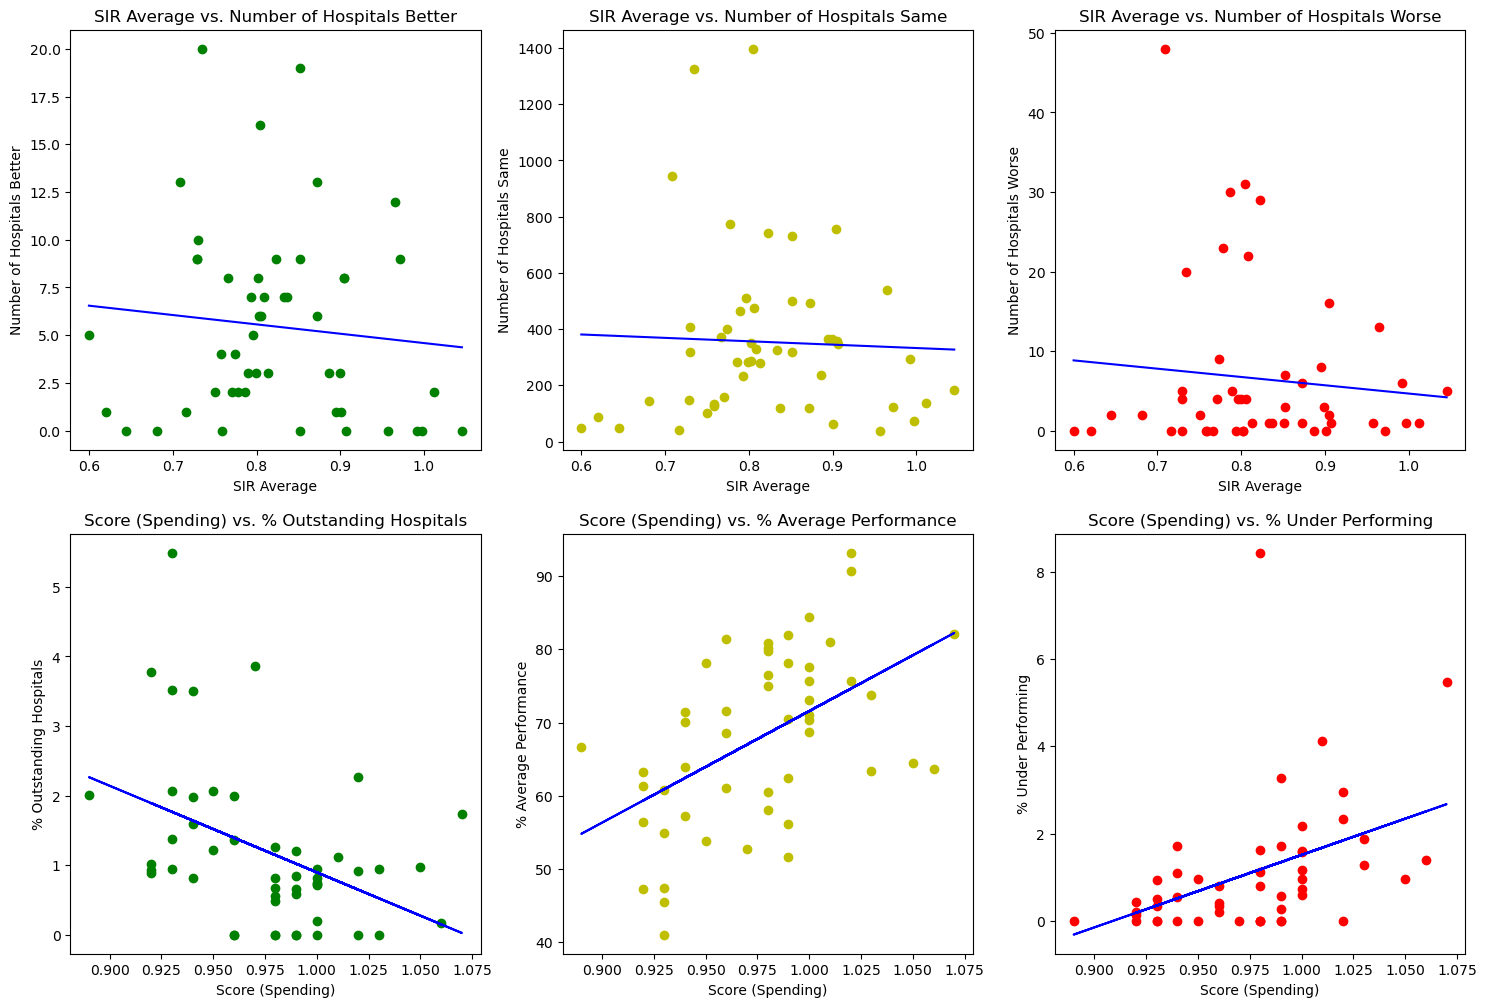

In [13]:
# create scatterplots for worse, same, better, and Outstanding, Average, and Underperforming
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

#Scatter plots for SIR average vs Readmission rates
for i, metric in enumerate(reordered_metrics_top):
    x_data = merged_df['SIR Average']
    y_data = merged_df[metric]
    axs[0, i].scatter(x_data, y_data, color=colors_top_row[metric], label=metric)
    add_linear_regression(axs[0, i], x_data, y_data, 'blue')
    axs[0, i].set_title(f'SIR Average vs. {metric}')
    axs[0, i].set_xlabel('SIR Average')
    axs[0, i].set_ylabel(metric)

# Scatter plots for Medicare Spending Score vs Readmission rates
for i, metric in enumerate(reordered_metrics_bottom):
    x_data = merged_df['Spending Score']
    y_data = merged_df[metric]
    axs[1, i].scatter(x_data, y_data, color=colors_bottom_row[metric], label=metric)
    add_linear_regression(axs[1, i], x_data, y_data, 'blue')
    axs[1, i].set_title(f'Score (Spending) vs. {metric}')
    axs[1, i].set_xlabel('Score (Spending)')
    axs[1, i].set_ylabel(metric)





In [11]:
#Show the plots
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>